# Setup the Seurat Object

In [20]:
library(dplyr)
library(patchwork)
library(Seurat)

In [21]:
# Load the dataset
# For output from CellRanger < 3.0
cart2_data_dir_ch1 <- '/mnt/storage/arman/oxplored/OXPL-10Xsc-C-I-001/sequencing_data/CARTC03002LIa2CLL-BU/CITESEQ/REX-aggr/05_CARTC03002LIa2CLL-BU_ch1_GEX-5pr-v2.0/outs/filtered_feature_bc_matrix/'
cart2_data_dir_ch2 <- '/mnt/storage/arman/oxplored/OXPL-10Xsc-C-I-001/sequencing_data/CARTC03002LIa2CLL-BU/CITESEQ/REX-aggr/06_CARTC03002LIa2CLL-BU_ch2_GEX-5pr-v2.0/outs/filtered_feature_bc_matrix/'

cart4_data_dir_ch1 <- '/mnt/storage/arman/oxplored/OXPL-10Xsc-C-I-003/sequencing_data/CARTC03004LIa1CLL-BU/CITESEQ/REX-aggr/CARTC03004LIa1CLL-BU_ch1/outs/filtered_feature_bc_matrix/'
cart4_data_dir_ch2 <- '/mnt/storage/arman/oxplored/OXPL-10Xsc-C-I-003/sequencing_data/CARTC03004LIa1CLL-BU/CITESEQ/REX-aggr/CARTC03004LIa1CLL-BU_ch2/outs/filtered_feature_bc_matrix/'

cart7_data_dir_ch1 <- '/mnt/storage/arman/oxplored/OXPL-10Xsc-C-I-003/sequencing_data/CARTC03007LIa1CLL-BU-fro/CITESEQ/REX-aggr/CARTC03007LIa1CLL-BU-fro_ch1/outs/filtered_feature_bc_matrix/'
cart7_data_dir_ch2 <- '/mnt/storage/arman/oxplored/OXPL-10Xsc-C-I-003/sequencing_data/CARTC03007LIa1CLL-BU-fro/CITESEQ/REX-aggr/CARTC03007LIa1CLL-BU-fro_ch2/outs/filtered_feature_bc_matrix/'

cart2_ch1_Data <- Read10X(data.dir = cart2_data_dir_ch1)
cart2_ch2_Data <- Read10X(data.dir = cart2_data_dir_ch2)

cart4_ch1_Data <- Read10X(data.dir = cart4_data_dir_ch1)
cart4_ch2_Data <- Read10X(data.dir = cart4_data_dir_ch2)

cart7_ch1_Data <- Read10X(data.dir = cart7_data_dir_ch1)
cart7_ch2_Data <- Read10X(data.dir = cart7_data_dir_ch2)

What does data in a count matrix look like?

In [22]:
# Initialize the Seurat object with the raw (non-normalized data).
cart2_ch1_Object = CreateSeuratObject(counts = cart2_ch1_Data, project = 'cart2_ch1')
cart2_ch1_Object
cart2_ch2_Object = CreateSeuratObject(counts = cart2_ch2_Data, project = 'cart2_ch2')
cart2_ch2_Object

cart4_ch1_Object = CreateSeuratObject(counts = cart4_ch1_Data, project = 'cart4_ch1')
cart4_ch1_Object
cart4_ch2_Object = CreateSeuratObject(counts = cart4_ch2_Data, project = 'cart4_ch2')
cart4_ch2_Object

cart7_ch1_Object = CreateSeuratObject(counts = cart7_ch1_Data, project = 'cart7_ch1')
cart7_ch1_Object
cart7_ch2_Object = CreateSeuratObject(counts = cart7_ch2_Data, project = 'cart7_ch2')
cart7_ch2_Object

An object of class Seurat 
36601 features across 924 samples within 1 assay 
Active assay: RNA (36601 features, 0 variable features)

An object of class Seurat 
36601 features across 847 samples within 1 assay 
Active assay: RNA (36601 features, 0 variable features)

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


An object of class Seurat 
36738 features across 17420 samples within 1 assay 
Active assay: RNA (36738 features, 0 variable features)

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


An object of class Seurat 
36738 features across 22886 samples within 1 assay 
Active assay: RNA (36738 features, 0 variable features)

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


An object of class Seurat 
36738 features across 13249 samples within 1 assay 
Active assay: RNA (36738 features, 0 variable features)

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


An object of class Seurat 
36738 features across 11108 samples within 1 assay 
Active assay: RNA (36738 features, 0 variable features)

In [23]:
# Combine channels 1 & 2 into one dataset, labeling the run ID to cells
cart_Object <- merge(cart2_ch1_Object, y = c(cart2_ch2_Object, cart4_ch1_Object, cart4_ch2_Object, cart7_ch1_Object, cart7_ch2_Object), add.cell.ids = c("cart2_ch1", "cart2_ch2", "cart4_ch1", "cart4_ch2", "cart7_ch1", "cart7_ch2"), project = "cart")
cart_Object

An object of class Seurat 
36738 features across 66434 samples within 1 assay 
Active assay: RNA (36738 features, 0 variable features)

In [24]:
# Examine a few features in the first thirty cells
#cart_ch1_Data[c("TMEM52", "FAAP20", "DFFB"), 1:30]

In [25]:
#dense.size <- object.size(as.matrix(cart_ch1_Data))
#dense.size

In [26]:
#sparse.size <- object.size(cart_ch1_Data)
#sparse.size

# Standard pre-processing workflow

# QC and selecting cells for further analysis

In [27]:
# Show QC metrics for the first 5 cells
#head(cart_Object@meta.data, 5)

Where are QC metrics stored in Seurat?

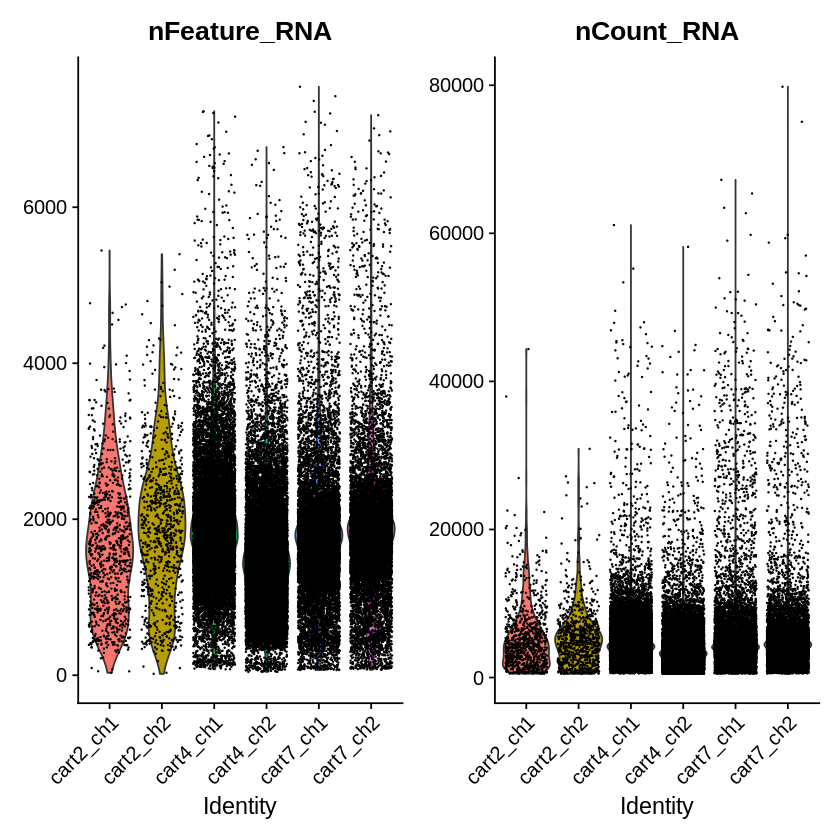

In [28]:
# Visualize QC metrics as a violin plot
VlnPlot(cart_Object, features = c("nFeature_RNA", "nCount_RNA"), ncol = 2)
#options(repr.plot.width=20, repr.plot.height=12)

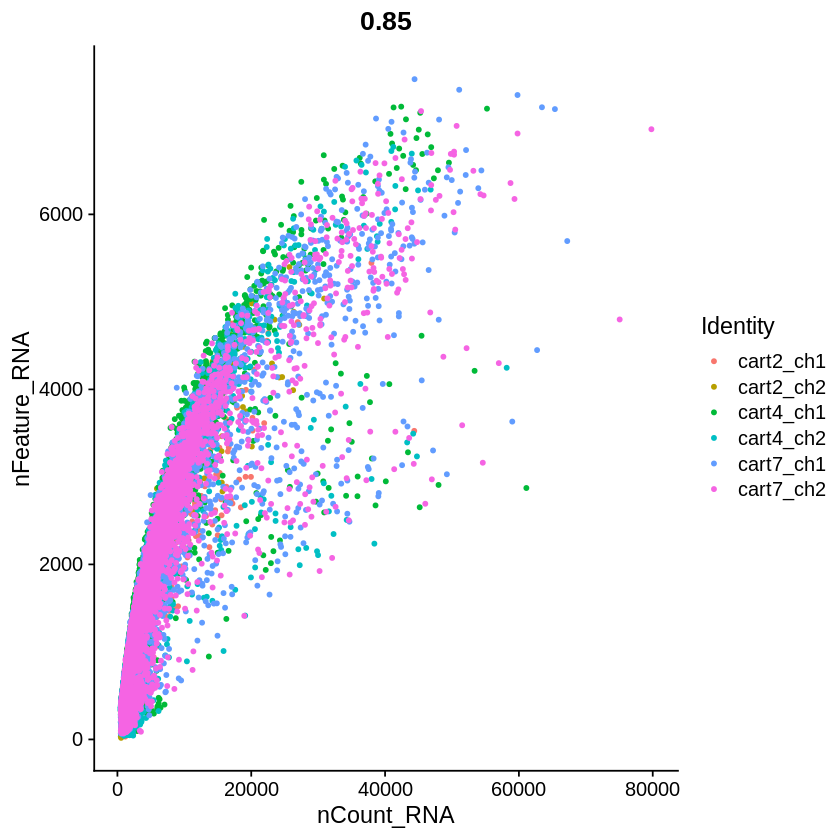

In [29]:
# FeatureScatter is typically used to visualize feature-feature relationships, but can be used for anything calculated by the object, i.e. columns in object metadata, PC scores etc.
plot1 <- FeatureScatter(cart_Object, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")
plot1

# Filtering and normalizing the data

In [30]:
# Filter for the number of features
cart_Object <- subset(cart_Object, subset = nFeature_RNA < 8000)

In [31]:
# Log normalization: normalizes feature expression measurements for each cell by the total expression, multiplies it by a scale factor (10,000 by default), and log-transforms the result.
# Default values of the function are provided, though the same behavior would be achieved without them. Normalized values are stored in pbmc[["RNA"]]@data.
cart_Object <- NormalizeData(cart_Object)#, normalization.method = "LogNormalize", scale.factor = 10000)

# Identification of highly variable features (feature selection)


[1] "IGHG1"    "IGKC"     "JCHAIN"   "IGHA1"    "C11orf96" "CCL2"    
 [7] "HBB"      "HSPA6"    "IGHG2"    "CXCL12"

When using repel, set xnudge and ynudge to 0 for optimal results

Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Removed 8816 rows containing missing values (geom_point).”


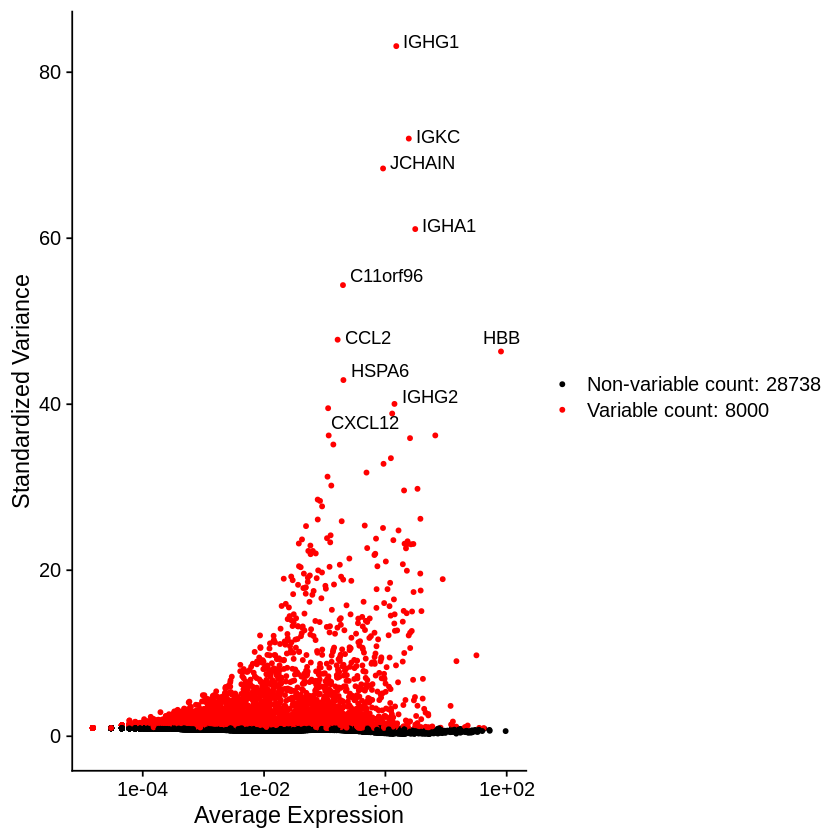

In [32]:
cart_Object <- FindVariableFeatures(cart_Object, selection.method = "vst", nfeatures = 8000)

# Identify the 10 most highly variable genes
top10 <- head(VariableFeatures(cart_Object), 10)
top10
# plot variable features with and without labels
plot1 <- VariableFeaturePlot(cart_Object)
plot2 <- LabelPoints(plot = plot1, points = top10, repel = TRUE)#, xnudge = 0, ynudge = )
plot2

# Scaling the data

In [33]:
#all.genes <- rownames(cart_Object)
#cart_Object <- ScaleData(cart_Object, features = all.genes)

This step takes too long! Can I make it faster?

In [34]:
cart_Object <- ScaleData(cart_Object)

Centering and scaling data matrix



How can I remove unwanted sources of variation, as in Seurat v2?

In [35]:
# Is it meaningful here?
#cart_Object <- ScaleData(cart_Object, vars.to.regress = "percent.mt")

# Perform linear dimensional reduction

In [36]:
cart_Object <- RunPCA(cart_Object, features = VariableFeatures(object = cart_Object))

PC_ 1 
Positive:  IGHM, IGLC2, IGLV2-8, IGHV1-18, HLA-DPB1, IGHG3, IGHA1, HLA-DRB5, IGLC3, IGHG2 
	   IGHD, ID3, MYL9, LILRA4, CD83, IGHV3-7, IGLV10-54, IGLC1, KLHL14, TXNDC5 
	   JUN, C0029-TotalSeqC, LINC02161, FILIP1L, COCH, HS3ST1, PALM2-AKAP2, CRIP3, VPREB3, APOD 
Negative:  TYMS, PCLAF, KLF1, CA1, GATA1, GFI1B, CDT1, MKI67, BLVRB, PRKAR2B 
	   CA2, AHSP, CENPF, RRM2, SYNGR1, TPX2, KCNH2, FAM178B, PKLR, ADD2 
	   MBOAT2, TOP2A, BIRC5, CD36, MYL4, NUSAP1, CCNB2, FN3K, CDK1, CDC20 
PC_ 2 
Positive:  CEBPD, S100A11, TYROBP, FOS, CST3, FCER1G, ANXA1, FCN1, AIF1, LYZ 
	   LST1, ITGB2, S100A10, SERPINA1, S100A9, CFD, CSTA, TIMP1, VCAN, IFITM3 
	   CFP, TNFAIP2, ZYX, FYB1, TMEM176B, S100A8, CD14, TYMP, RGS2, EFHD2 
Negative:  AHSP, HBD, HBM, CA1, ALAS2, SLC4A1, HBB, HBA1, GYPB, KLF1 
	   EPB42, RHAG, HEMGN, HBA2, GYPA, HMBS, CA2, SPTA1, ANK1, SELENBP1 
	   SPTB, HBQ1, SLC25A37, TLCD4, MYL4, SNCA, GATA1, RHCE, KEL, FECH 
PC_ 3 
Positive:  FCN1, LYZ, S100A9, S100A8, LST1, SERPINA1, AIF1, C

In [37]:
# Examine and visualize PCA results a few different ways
#print(cart_Object[["pca"]], dims = 1:5, nfeatures = 5)

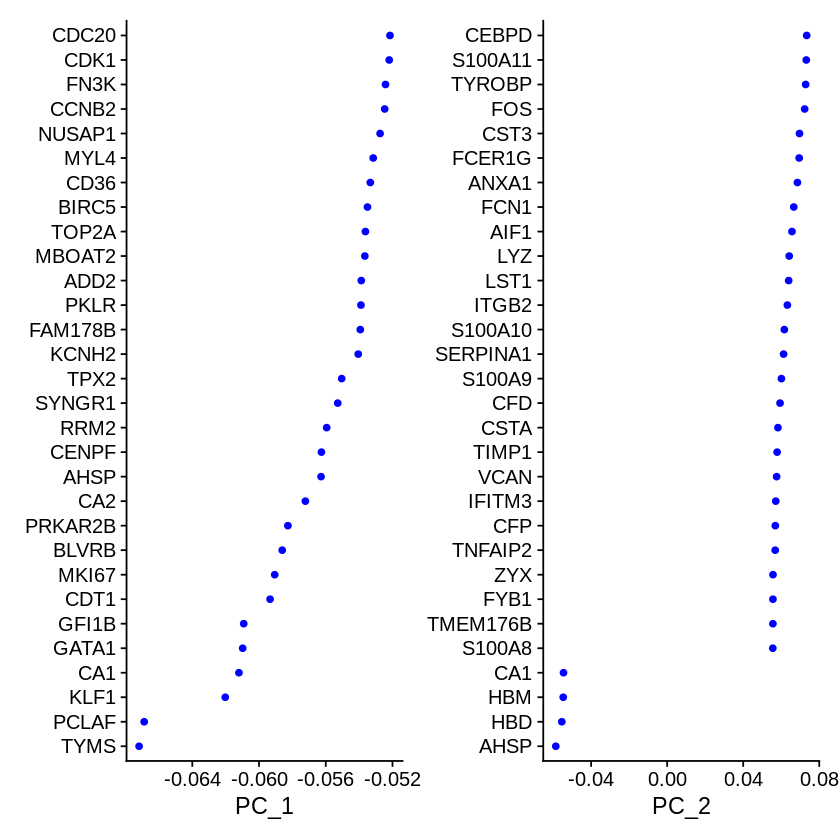

In [38]:
VizDimLoadings(cart_Object, dims = 1:2, reduction = "pca")

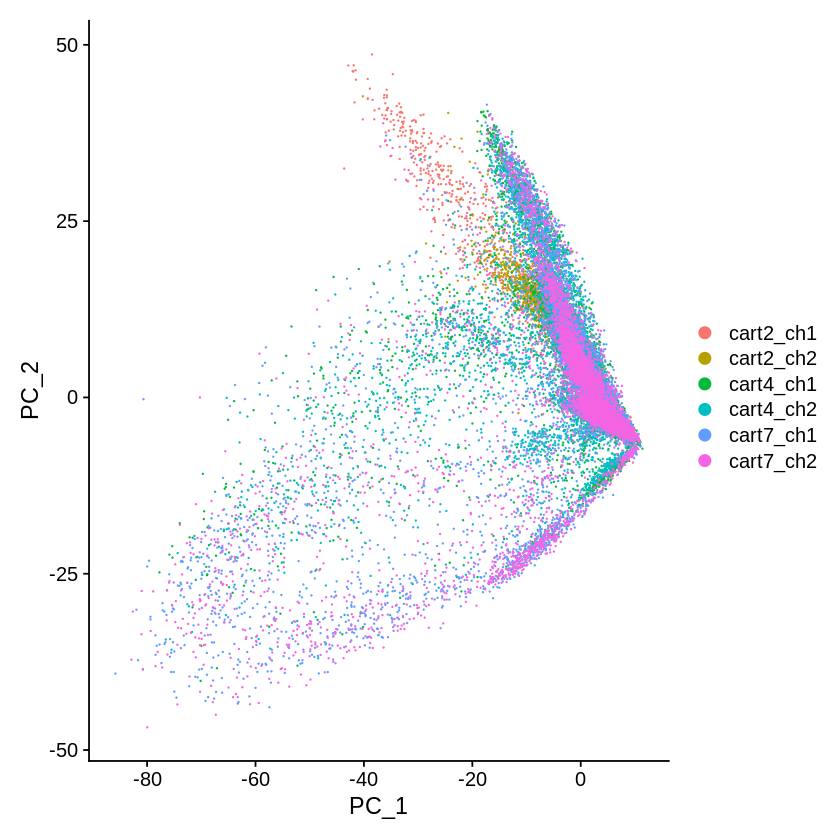

In [39]:
DimPlot(cart_Object, reduction = "pca")

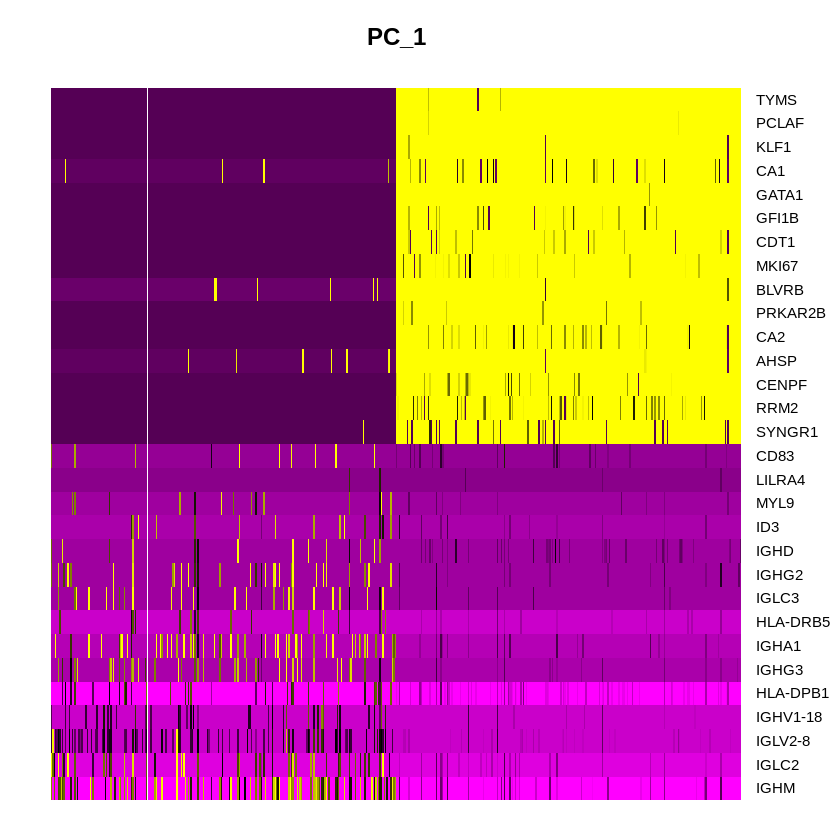

In [40]:
DimHeatmap(cart_Object, dims = 1, cells = 500, balanced = TRUE)

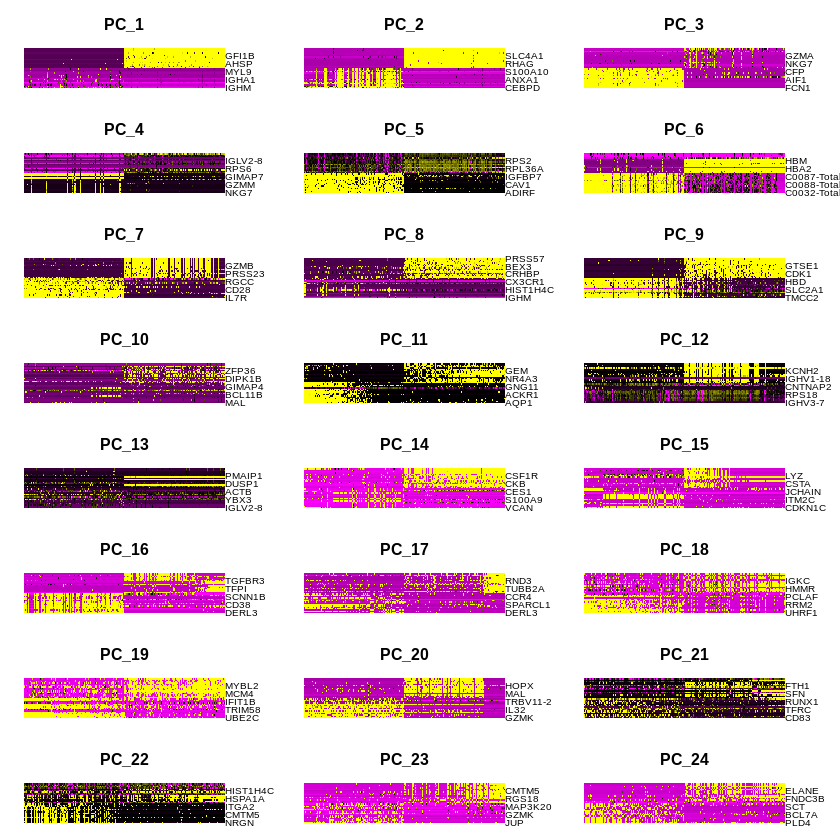

In [41]:
DimHeatmap(cart_Object, dims = 1:24, cells = 500, balanced = TRUE)

# Determine the ‘dimensionality’ of the dataset

In [42]:
# NOTE: This process can take a long time for big datasets, comment out for expediency. More
# approximate techniques such as those implemented in ElbowPlot() can be used to reduce
# computation time
cart_Object <- JackStraw(cart_Object, num.replicate = 100, dims = 30)
cart_Object <- ScoreJackStraw(cart_Object, dims = 1:30)

Warning message:
“Removed 168000 rows containing missing values (geom_point).”


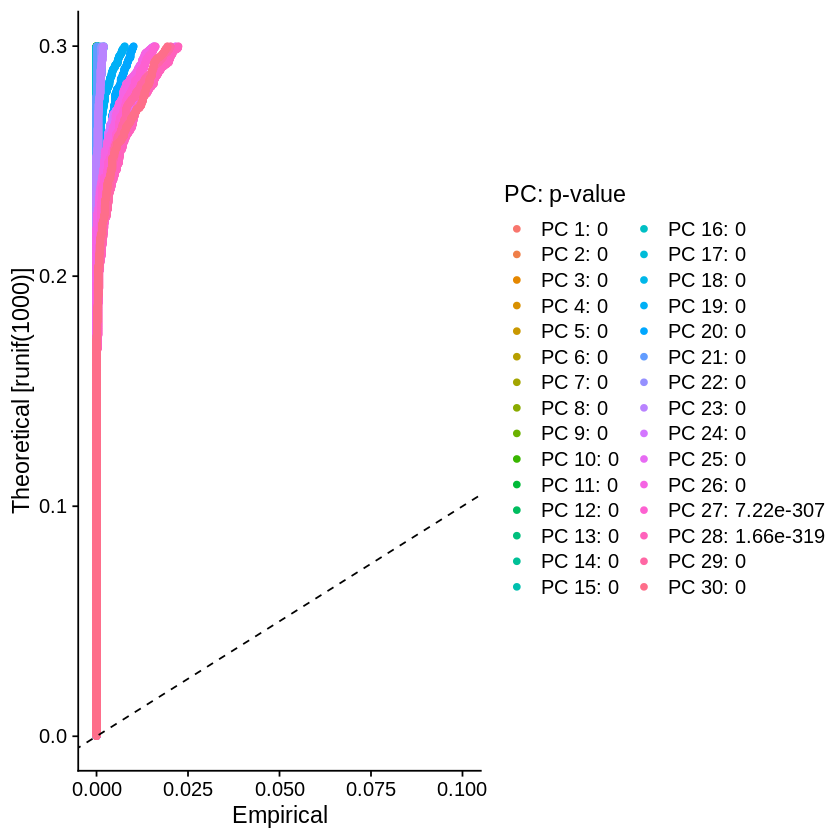

In [43]:
JackStrawPlot(cart_Object, dims = 1:30)

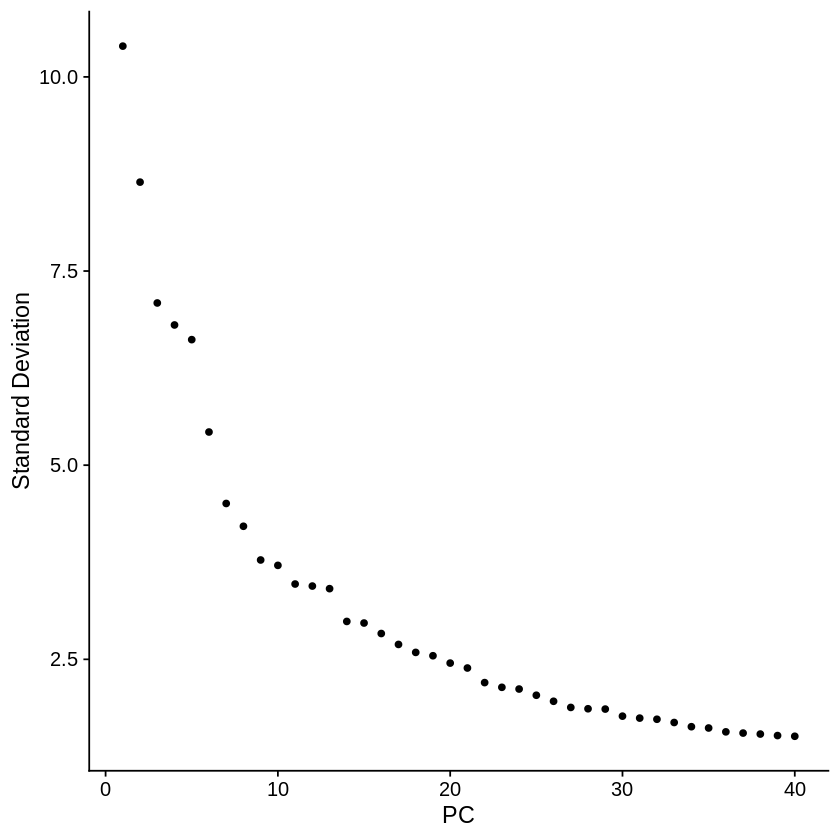

In [44]:
ElbowPlot(cart_Object, ndims = 40)

# Cluster the cells

In [45]:
cart_Object <- FindNeighbors(cart_Object, dims = 1:10)
cart_Object <- FindClusters(cart_Object, resolution = 0.5)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 66434
Number of edges: 1966393

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9341
Number of communities: 22
Elapsed time: 26 seconds


In [46]:
# Look at cluster IDs of the first 5 cells
#head(Idents(cart_Object), 5)

# Run non-linear dimensional reduction (UMAP/tSNE)

In [47]:
# If you haven't installed UMAP, you can do so via reticulate::py_install(packages = 'umap-learn')
cart_Object <- RunUMAP(cart_Object, dims = 1:10)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
13:31:04 UMAP embedding parameters a = 0.9922 b = 1.112

13:31:04 Read 66434 rows and found 10 numeric columns

13:31:04 Using Annoy for neighbor search, n_neighbors = 30

13:31:04 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

13:31:15 Writing NN index file to temp file /tmp/RtmpcuNZ4D/filea8eab7dbb5c3a

13:31:15 Searching Annoy index using 1 thread, search_k = 3000

13:31:57 Annoy recall = 100%

13:31:59 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors

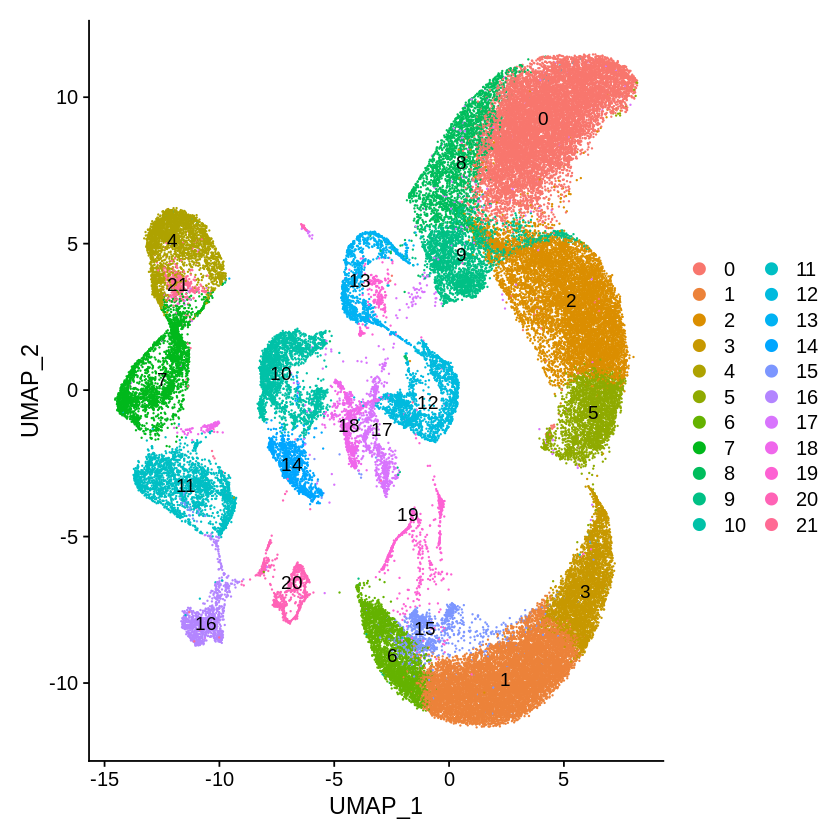

In [48]:
# note that you can set `label = TRUE` or use the LabelClusters function to help label individual clusters
DimPlot(cart_Object, reduction = "umap", label = TRUE)

In [49]:
#saveRDS(cart_Object, file = "~/output/cart.rds")

# Finding differentially expressed features (cluster biomarkers)

In [50]:
# # find all markers of cluster 2
# cluster2.markers <- FindMarkers(cart_Object, ident.1 = 2, min.pct = 0.25)
# head(cluster2.markers, n = 5)

In [51]:
# # find all markers distinguishing cluster 5 from clusters 0 and 3
# cluster5.markers <- FindMarkers(cart_Object, ident.1 = 5, ident.2 = c(0, 3), min.pct = 0.25)
# head(cluster5.markers, n = 5)

In [52]:
# find markers for every cluster compared to all remaining cells, report only the positive ones
cart_Object.markers <- FindAllMarkers(cart_Object, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)
cart_Object.markers %>%
    group_by(cluster) %>%
    slice_max(n = 2, order_by = avg_log2FC)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8

Calculating cluster 9

Calculating cluster 10

Calculating cluster 11

Calculating cluster 12

Calculating cluster 13

Calculating cluster 14

Calculating cluster 15

Calculating cluster 16

Calculating cluster 17

Calculating cluster 18

Calculating cluster 19

Calculating cluster 20

Calculating cluster 21



p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
0.000000e+00,3.5622551,0.985,0.091,0.000000e+00,0,IGHV3-7
0.000000e+00,3.3676504,0.984,0.084,0.000000e+00,0,IGLV10-54
0.000000e+00,1.4024376,0.995,0.494,0.000000e+00,1,IGLV2-8
0.000000e+00,1.2988862,0.984,0.447,0.000000e+00,1,IGHV1-18
0.000000e+00,1.2942048,0.977,0.506,0.000000e+00,2,IGLV2-8
0.000000e+00,1.2517848,0.970,0.459,0.000000e+00,2,IGHV1-18
0.000000e+00,1.1428500,0.997,0.545,0.000000e+00,3,IGLV2-8
0.000000e+00,1.0045015,0.991,0.501,0.000000e+00,3,IGHV1-18
0.000000e+00,2.6969934,0.939,0.086,0.000000e+00,4,CD3E


In [53]:
# cluster0.markers <- FindMarkers(cart_Object, ident.1 = 0, logfc.threshold = 0.25, test.use = "roc", only.pos = TRUE)

In [54]:
# # VlnPlot(cart_Object, features = c("NOTCH1", "MYD88", "XPO1", "KLHL6", "SF3B1", "TP53", "ATM", "POT1", "DDX3X", "ZMYM3", "CHD2", "BIRC3"))
# VlnPlot(cart_Object, features = c("RPS12", "IL32", "S100A8"))

In [55]:
# # you can plot raw counts as well
# VlnPlot(cart_Object, features = c("RPS12", "IL32", "S100A8"), slot = "counts", log = TRUE)

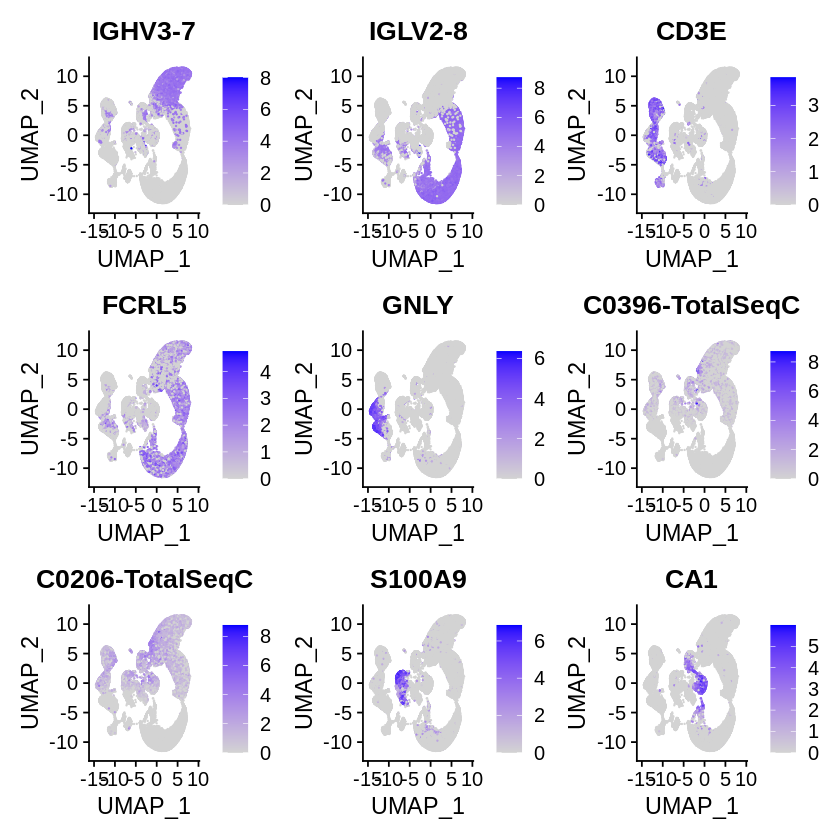

In [62]:
FeaturePlot(cart_Object, features = c("IGHV3-7", "IGLV2-8", "CD3E", "FCRL5", "GNLY", "C0396-TotalSeqC", "C0206-TotalSeqC", "S100A9", "CA1"))

Warning message in DoHeatmap(cart_Object, features = top10$gene):
“The following features were omitted as they were not found in the scale.data slot for the RNA assay: TCF7, ATF7IP, HNRNPU, NCL, TTN, MT-ND4, MT-ND5, C0020-TotalSeqC, C0158-TotalSeqC, PARP15, FCRL2, MT-ND6, MT-CO2, MALAT1, MT-CO1, MT-ATP6, MT-ATP8, MT-CYB, FCER2, LRMP, DNPH1, WNT3, MMP17, FCRL5, CD72, CCDC88A, IGFBP4, HLA-DQA1, RPS4Y1, TCL1A, BANK1”


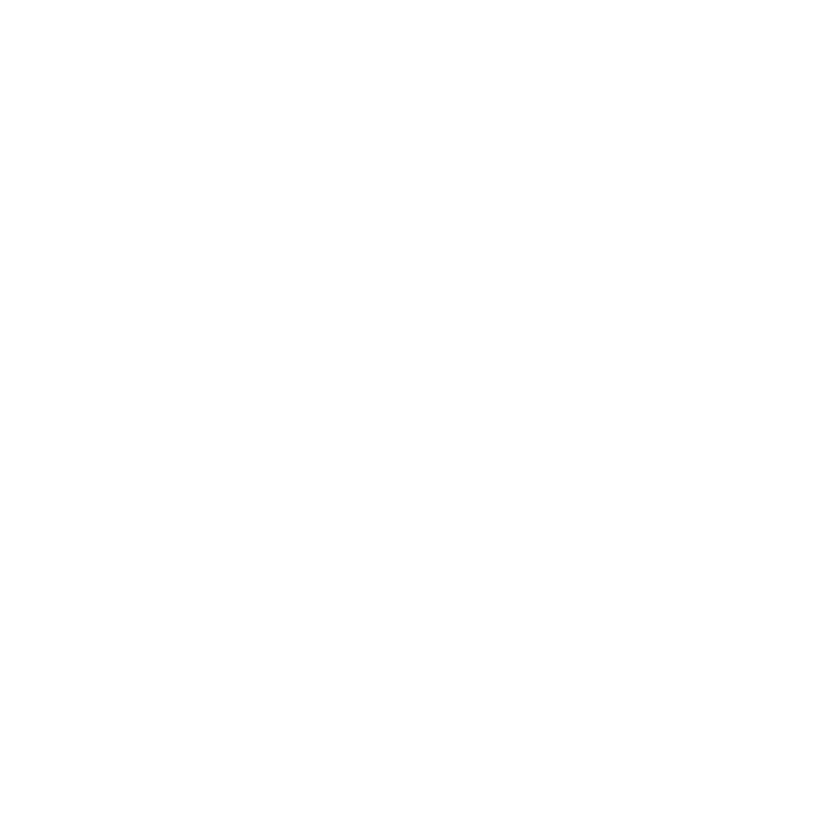

In [57]:
cart_Object.markers %>%
    group_by(cluster) %>%
    top_n(n = 10, wt = avg_log2FC) -> top10
DoHeatmap(cart_Object, features = top10$gene) + NoLegend()

# Assigning cell type identity to clusters


In [58]:
# new.cluster.ids <- c("Naive CD4 T", "CD14+ Mono", "Memory CD4 T", "B", "CD8 T", "FCGR3A+ Mono",
#     "NK", "DC", "Platelet")
# names(new.cluster.ids) <- levels(cart_Object)
# cart_Object <- RenameIdents(cart_Object, new.cluster.ids)
# DimPlot(cart_Object, reduction = "umap", label = TRUE, pt.size = 0.5) + NoLegend()

In [59]:
# saveRDS(cart_Object, file = "../output/pbmc3k_final.rds")

Session info

In [60]:
sessionInfo()

R version 4.1.0 (2021-05-18)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 22.04.1 LTS

Matrix products: default
BLAS/LAPACK: /home/arman/mambaforge/lib/libopenblasp-r0.3.18.so

locale:
 [1] LC_CTYPE=en_GB.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_GB.UTF-8        LC_COLLATE=en_GB.UTF-8    
 [5] LC_MONETARY=en_GB.UTF-8    LC_MESSAGES=en_GB.UTF-8   
 [7] LC_PAPER=en_GB.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_GB.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] sp_1.5-0           SeuratObject_4.1.1 Seurat_4.1.1       patchwork_1.1.2   
[5] dplyr_1.0.10      

loaded via a namespace (and not attached):
  [1] Rtsne_0.16            colorspace_2.0-3      deldir_1.0-6         
  [4] ellipsis_0.3.2        ggridges_0.5.3        IRdisplay_1.1        
  [7] base64enc_0.1-3     